# MARKET SEGMENTATION (KMean Clustering)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('store.csv')

In [3]:
data.shape

(10000, 5)

In [4]:
data.isnull().sum()

reps       0
product    0
qty        0
revenue    0
region     0
dtype: int64

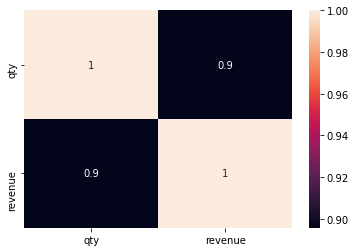

In [5]:
sns.heatmap(data.corr(), annot=True)

In [6]:
data

,reps,product,qty,revenue,region
0,Chitra,Galaxy,2,155.10,West
1,Vijay,Jet,2,39.30,North
2,Mala,Beacon,3,74.25,West
3,Suman,Alpen,3,100.98,North
4,Rachna,Orbit,2,44.98,North
...,...,...,...,...,...
9995,Sumedh,Jet,12,233.42,West
9996,Mala,Almond,2,48.50,West
9997,Santosh,Almond,1,25.00,West
9998,Ananya,Trident,2,59.40,North


# Transaction Column

This column shows how many transactions are done by each Representative

In [7]:
#creating transactions columns
count = data['reps'].value_counts()

In [8]:
count = count.to_dict()

In [9]:
data['transactions'] = data['reps'].map(count)

In [10]:
data

,reps,product,qty,revenue,region,transactions
0,Chitra,Galaxy,2,155.10,West,96
1,Vijay,Jet,2,39.30,North,111
2,Mala,Beacon,3,74.25,West,194
3,Suman,Alpen,3,100.98,North,173
4,Rachna,Orbit,2,44.98,North,318
...,...,...,...,...,...,...
9995,Sumedh,Jet,12,233.42,West,125
9996,Mala,Almond,2,48.50,West,194
9997,Santosh,Almond,1,25.00,West,318
9998,Ananya,Trident,2,59.40,North,216


In [11]:
max = data.groupby('reps')['transactions'].apply(lambda x: x.max())

In [12]:
max.sort_values(ascending=False)
#Seet has highest Transactions

reps
Seet       353
Rachna     318
Santosh    318
Aash       315
Vish       308
          ... 
Jay         84
Ram         84
Anusha      82
Sesh        81
Rohini      79
Name: transactions, Length: 72, dtype: int64

In [13]:
maxRev = data.groupby('reps')['revenue'].apply(lambda x: x.max())
maxRev.sort_values(ascending=False)

#Mala generated Maximum revenue once among all reps 1998

reps
Mala       1998.75
John       1918.80
Kishore    1838.85
Vijay      1820.46
Jay        1758.90
            ...   
Anahit      469.90
Ram         467.88
Rohini      425.15
Prarth      356.18
Veeyes      302.45
Name: revenue, Length: 72, dtype: float64

In [14]:
maxQty = data.groupby('reps')['qty'].apply(lambda x: x.max())
maxQty.sort_values(ascending=False)

#Maximum quantity of an product sold is 25

reps
Nidhi     25
Reva      25
Rajat     25
Rachna    25
Palak     25
          ..
Ram       19
Kamat     19
Jaggi     18
Prarth    16
Veeyes    13
Name: qty, Length: 72, dtype: int64

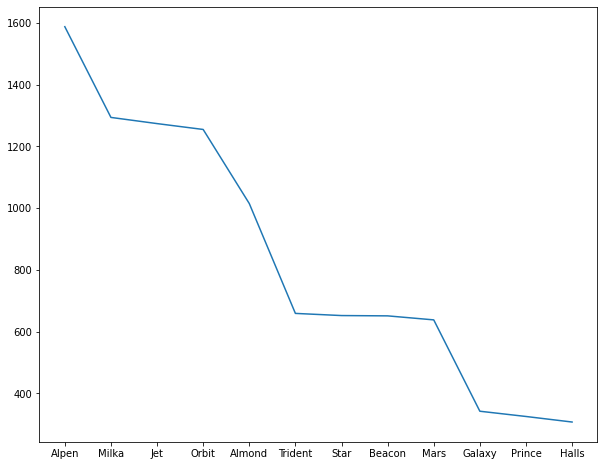

In [15]:
plt.figure(figsize=(10,8))
plt.plot(data['product'].value_counts())

#no. of transactions of products. We can see Alpen was dealt most number of time.

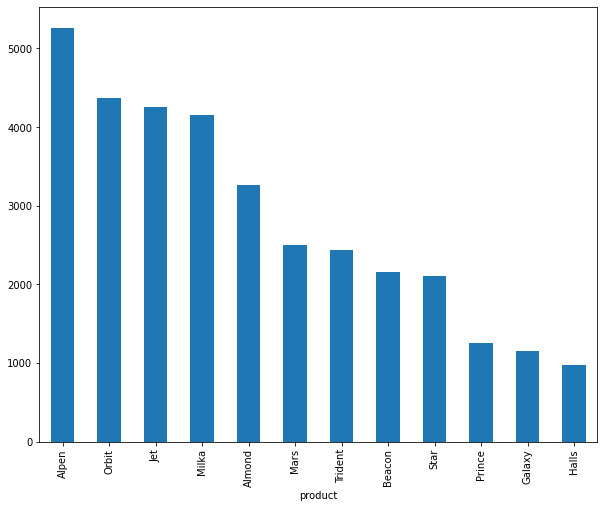

In [16]:
plt.figure(figsize=(10,8))
data.groupby('product')['qty'].sum().sort_values(ascending=False).plot.bar()

#barplot shows that Alpen was sold in most quantity

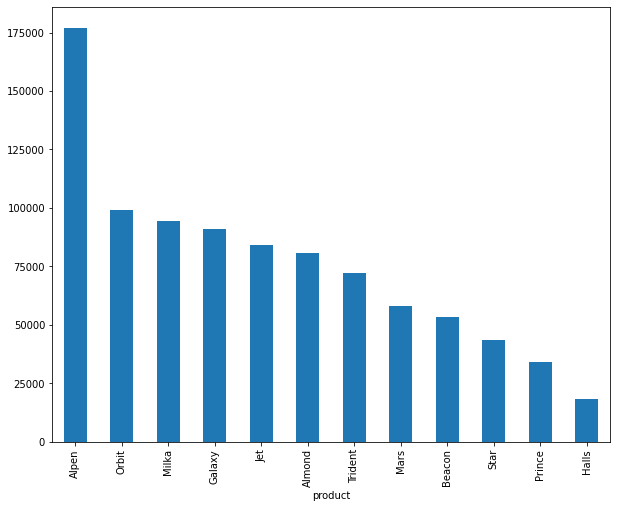

In [17]:
plt.figure(figsize=(10,8))
data.groupby('product')['revenue'].sum().sort_values(ascending=False).plot.bar()

#Alpen Generated the highest revenue

Text(0, 0.5, 'Total Revenue')

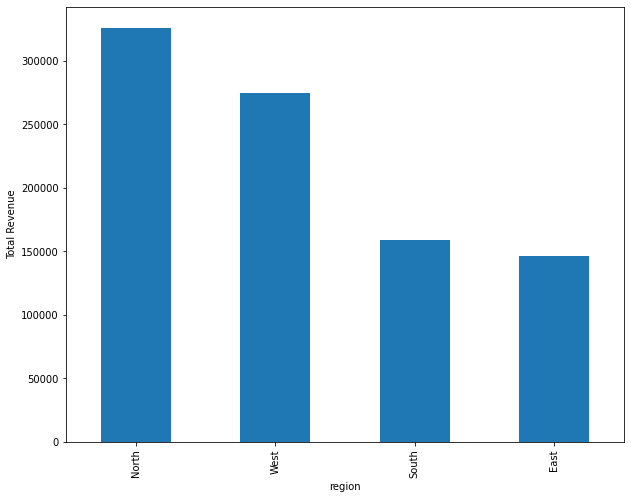

In [18]:
plt.figure(figsize=(10,8))
data.groupby('region')['revenue'].sum().sort_values(ascending=False).plot.bar()
plt.ylabel('Total Revenue')

#North region generatad highest revenue

Text(0, 0.5, 'Total Quantity')

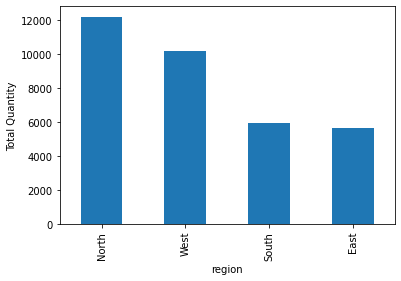

In [19]:
data.groupby('region')['qty'].sum().sort_values(ascending=False).plot.bar()
plt.ylabel('Total Quantity')

#North Region sold highest number of products

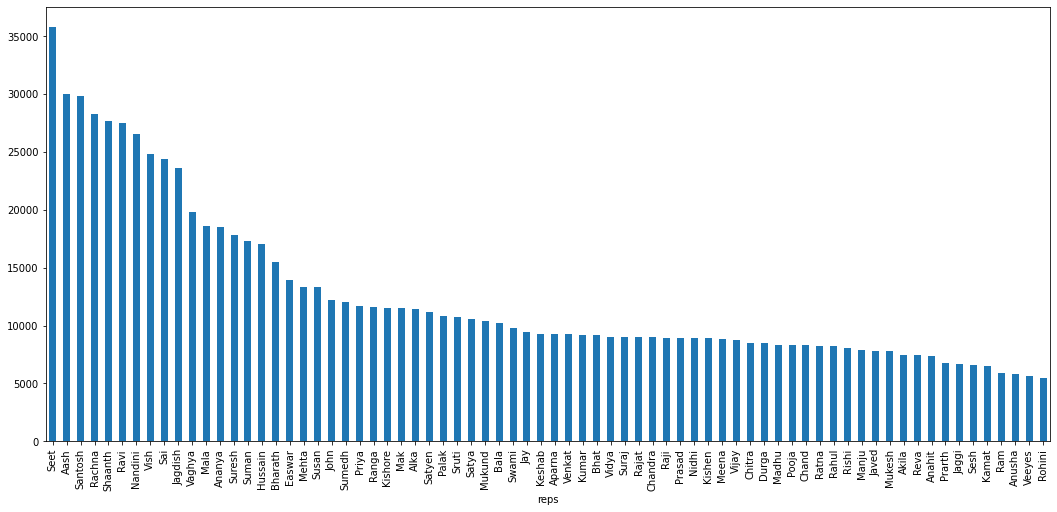

In [20]:
plt.figure(figsize=(18,8))

data.groupby('reps')['revenue'].sum().sort_values(ascending=False).plot.bar()

#Seet generated highest revenue

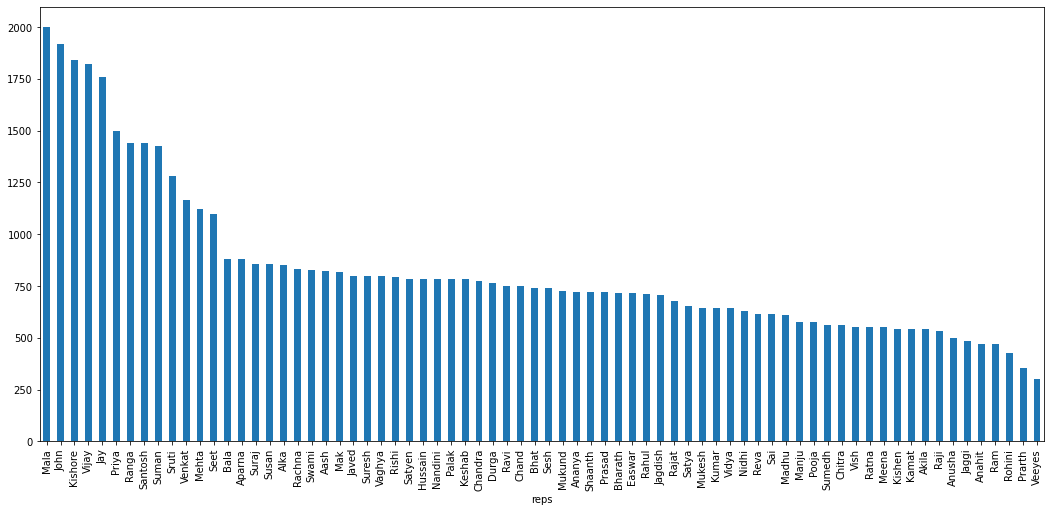

In [21]:
plt.figure(figsize=(18,8))

data.groupby('reps')['revenue'].max().sort_values(ascending=False).plot.bar()

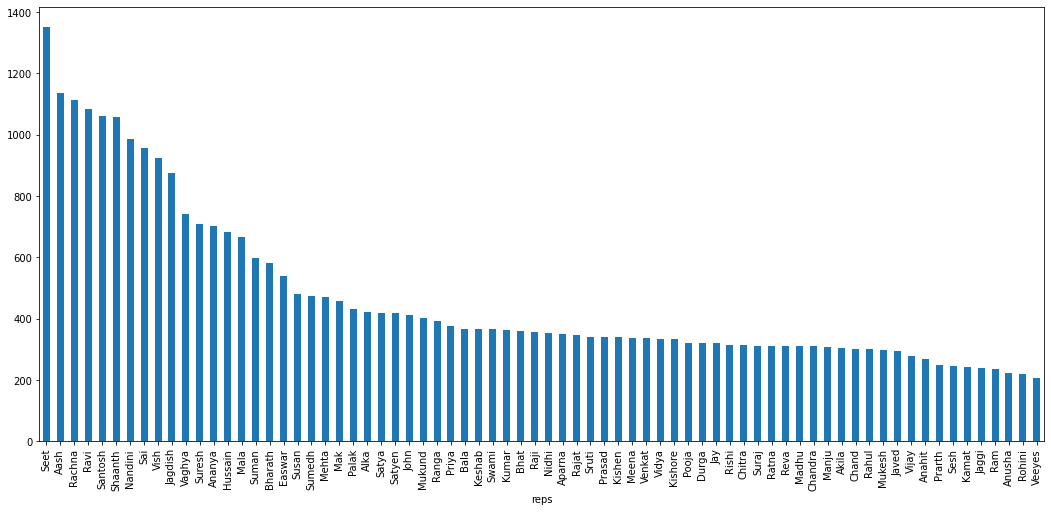

In [22]:
plt.figure(figsize=(18,8))

data.groupby('reps')['qty'].sum().sort_values(ascending=False).plot.bar()

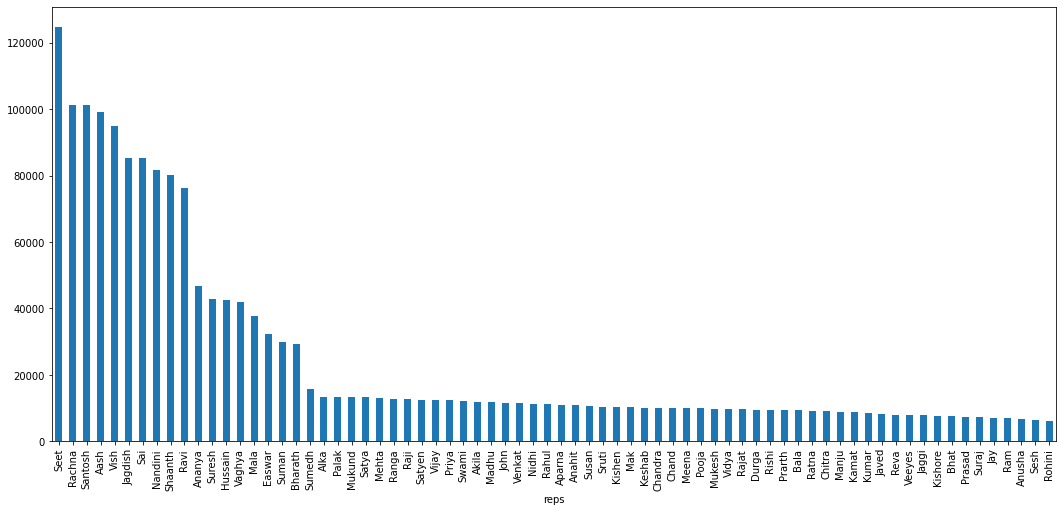

In [23]:
plt.figure(figsize=(18,8))

data.groupby('reps')['transactions'].sum().sort_values(ascending=False).plot.bar()

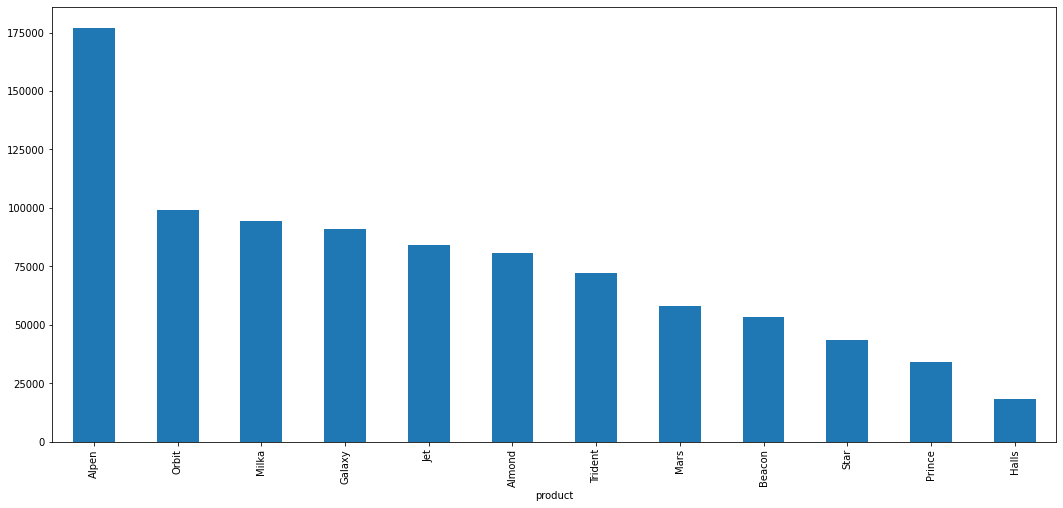

In [24]:
plt.figure(figsize=(18,8))

data.groupby('product')['revenue'].sum().sort_values(ascending=False).plot.bar()
#Product Alpen generated most revenue

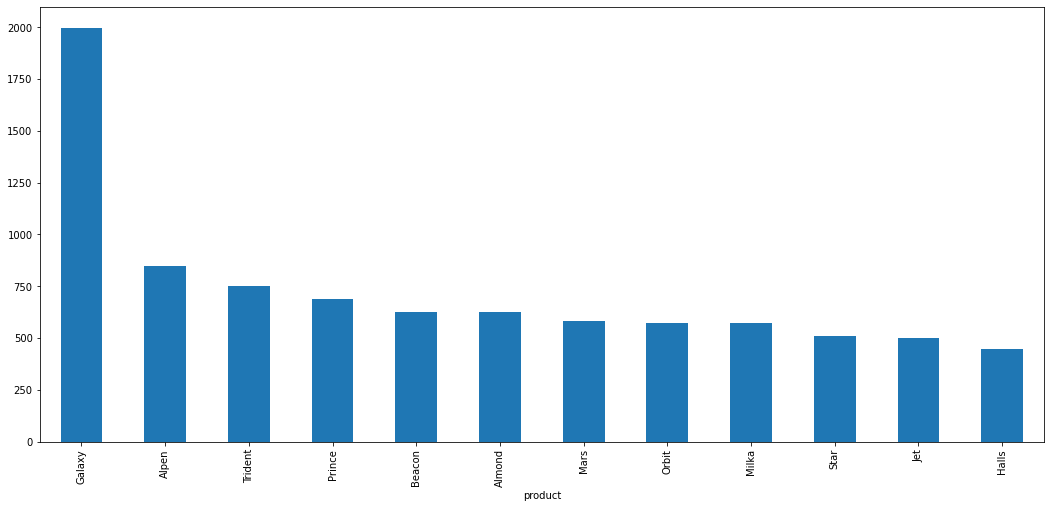

In [25]:
plt.figure(figsize=(18,8))

data.groupby('product')['revenue'].max().sort_values(ascending=False).plot.bar()

#Galaxy product dealt in one of the highest revenue 

In [26]:
data_west = data[data['region']=='West']
revWest = data_west.groupby('reps')['revenue'].sum()

In [27]:
revWest = revWest.sort_values(ascending=False)

Text(0, 0.5, 'West Revenue')

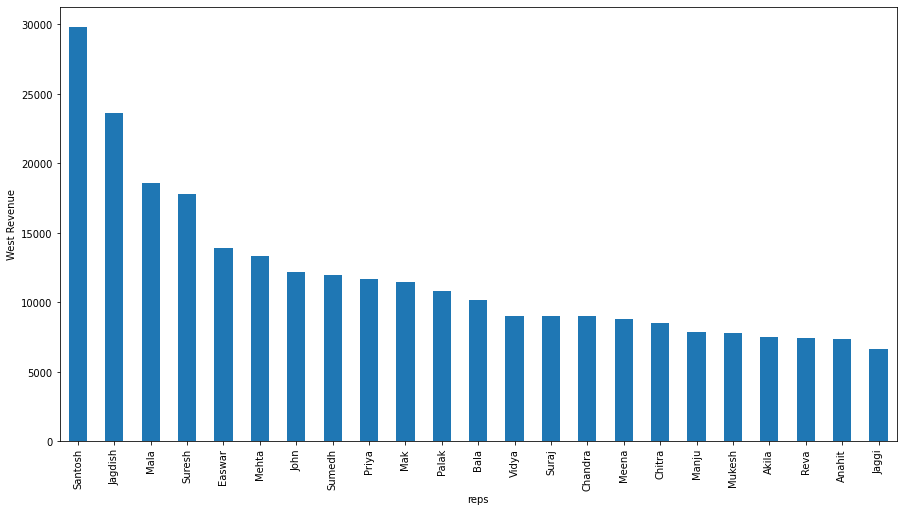

In [28]:
plt.figure(figsize=(15,8))

revWest.plot(kind='bar')
plt.ylabel('West Revenue')

#Santosh generated highest revenue in West

Text(0, 0.5, 'East Revenue')

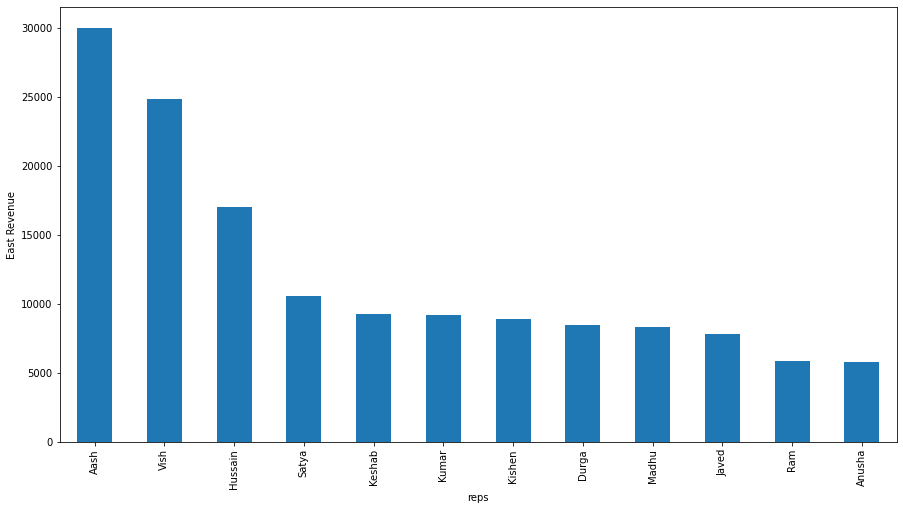

In [29]:
data_East = data[data['region']=='East']
revEast = data_East.groupby('reps')['revenue'].sum()
revEast = revEast.sort_values(ascending=False)
plt.figure(figsize=(15,8))

revEast.plot(kind='bar')
plt.ylabel('East Revenue')

#Aash generated highest revenue in West

Text(0, 0.5, 'North Revenue')

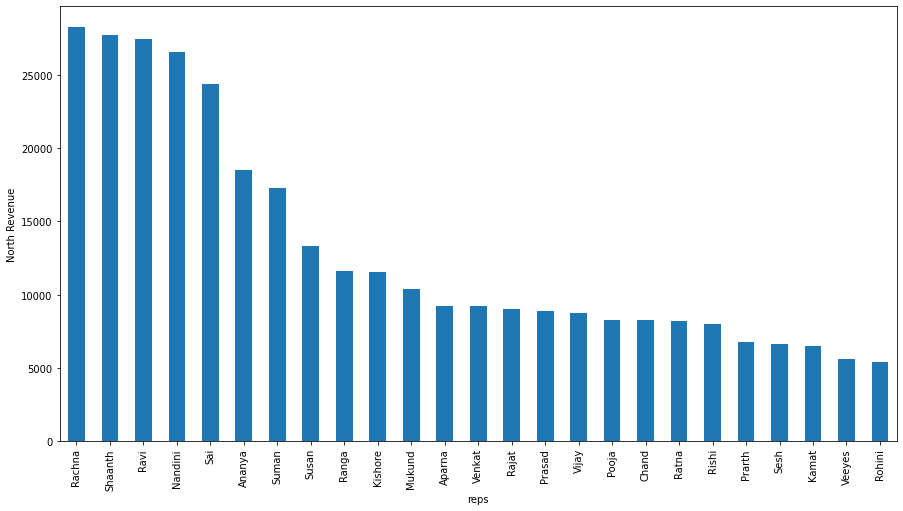

In [30]:
data_North = data[data['region']=='North']
revNorth = data_North.groupby('reps')['revenue'].sum()
revNorth = revNorth.sort_values(ascending=False)
plt.figure(figsize=(15,8))

revNorth.plot(kind='bar')
plt.ylabel('North Revenue')

#Rachna generated highest revenue in West

Text(0, 0.5, 'South Revenue')

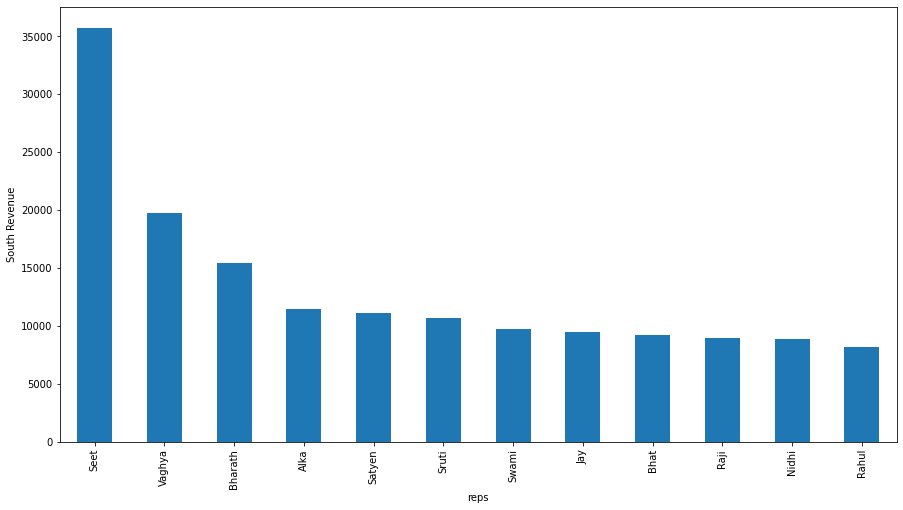

In [31]:
data_South = data[data['region']=='South']
revSouth = data_South.groupby('reps')['revenue'].sum()
revSouth = revSouth.sort_values(ascending=False)
plt.figure(figsize=(15,8))

revSouth.plot(kind='bar')
plt.ylabel('South Revenue')

#Seet generated highest revenue in West

Text(0, 0.5, 'East Revenue')

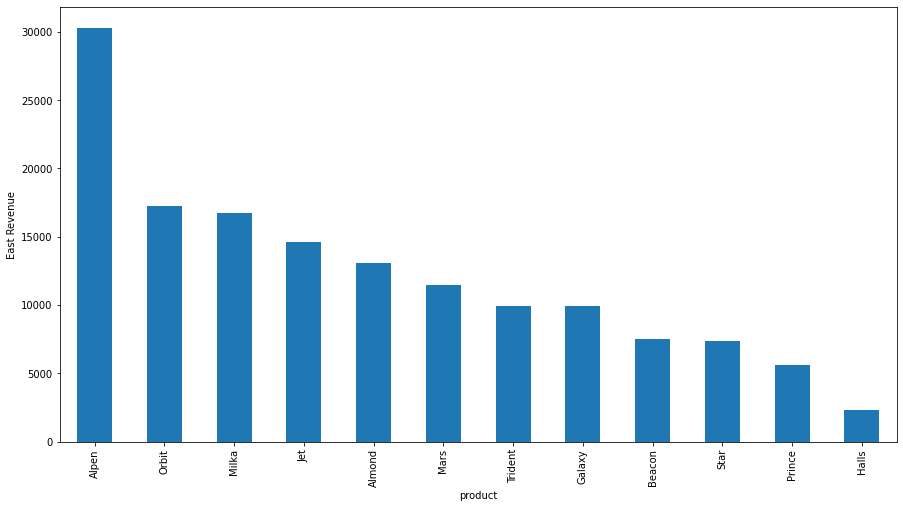

In [32]:
data_East_pro = data[data['region']=='East']
proEast = data_East_pro.groupby('product')['revenue'].sum()
proEast = proEast.sort_values(ascending=False)
plt.figure(figsize=(15,8))

proEast.plot(kind='bar')
plt.ylabel('East Revenue')

#Alpen generated most revenue in East

Text(0, 0.5, 'West Revenue')

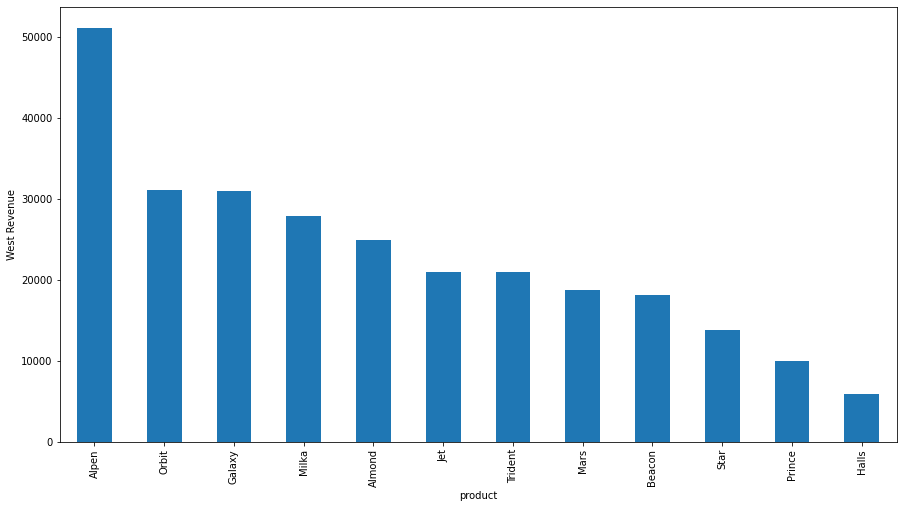

In [33]:
data_West_pro = data[data['region']=='West']
proWest = data_West_pro.groupby('product')['revenue'].sum()
proWest = proWest.sort_values(ascending=False)
plt.figure(figsize=(15,8))

proWest.plot(kind='bar')
plt.ylabel('West Revenue')

#Alpen generated most revenue in West

Text(0, 0.5, 'North Revenue')

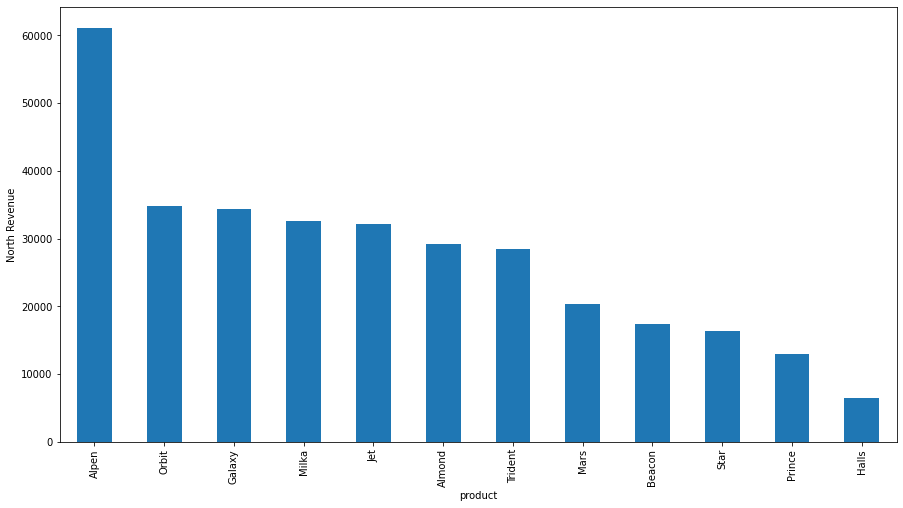

In [34]:
data_North_pro = data[data['region']=='North']
proNorth = data_North_pro.groupby('product')['revenue'].sum()
proNorth = proNorth.sort_values(ascending=False)
plt.figure(figsize=(15,8))

proNorth.plot(kind='bar')
plt.ylabel('North Revenue')

#Alpen generated most revenue in North and also East from above diagram

Text(0, 0.5, 'South Revenue')

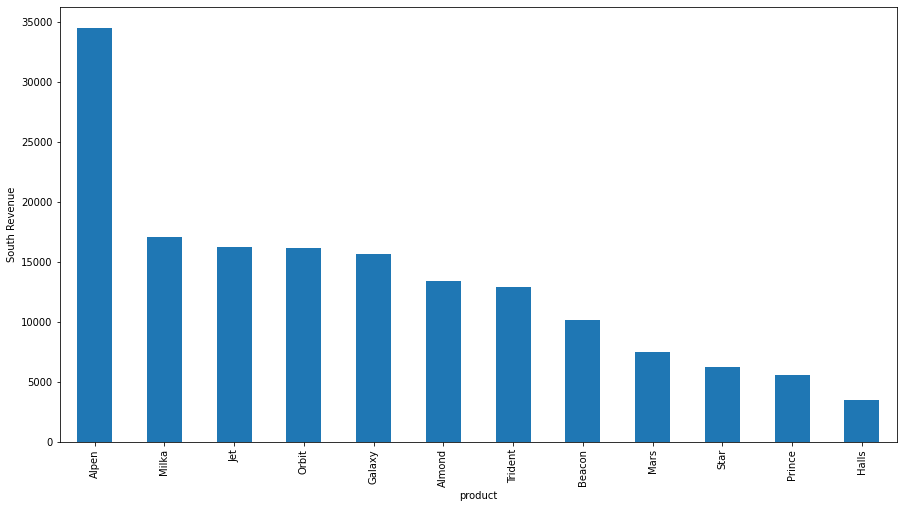

In [35]:
data_South_pro = data[data['region']=='South']
proSouth = data_South_pro.groupby('product')['revenue'].sum()
proSouth = proSouth.sort_values(ascending=False)
plt.figure(figsize=(15,8))

proSouth.plot(kind='bar')
plt.ylabel('South Revenue')

#Alpen generated most revenue in South

Alpen generated most revenue in all regions Howerve Orbit ranked 2nd in North, East and West region in generating revenue

In [36]:
data_rev = data.groupby('reps')['revenue'].apply(lambda x: x.sum())

In [37]:
data_rev

reps
Aash      29998.47
Akila      7495.80
Alka      11464.96
Anahit     7376.05
Ananya    18510.93
            ...   
Veeyes     5623.93
Venkat     9256.03
Vidya      9054.85
Vijay      8770.86
Vish      24834.71
Name: revenue, Length: 72, dtype: float64

In [38]:
data_trans = data.groupby('reps')['transactions'].apply(lambda x: x.sum())

In [39]:
data_trans

reps
Aash      99225
Akila     11881
Alka      13456
Anahit    10816
Ananya    46656
          ...  
Veeyes     7921
Venkat    11449
Vidya      9801
Vijay     12321
Vish      94864
Name: transactions, Length: 72, dtype: int64

In [40]:
df_rev = pd.DataFrame(data_rev)
df_trans = pd.DataFrame(data_trans)

In [41]:
#df_rev[:5]
df_trans[:4]

,transactions
reps,
Aash,99225
Akila,11881
Alka,13456
Anahit,10816


In [42]:
df_trans.columns = ['transactions']

In [43]:
df_trans.reset_index()

,reps,transactions
0,Aash,99225
1,Akila,11881
2,Alka,13456
3,Anahit,10816
4,Ananya,46656
...,...,...
67,Veeyes,7921
68,Venkat,11449
69,Vidya,9801
70,Vijay,12321


In [44]:
data_rev_trans = pd.concat([df_rev, df_trans], axis=1)

In [45]:
data_rev_trans = data_rev_trans.reset_index()

In [46]:
data_rev_trans.sort_values(by='revenue', ascending=False)

,reps,revenue,transactions
56,Seet,35747.41,124609
0,Aash,29998.47,99225
53,Santosh,29801.71,101124
41,Rachna,28263.75,101124
58,Shaanth,27692.49,80089
...,...,...,...
21,Kamat,6536.68,8836
45,Ram,5871.23,7056
5,Anusha,5816.29,6724
67,Veeyes,5623.93,7921


Text(0, 0.5, 'revenue')

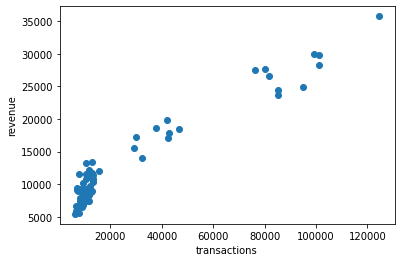

In [47]:
plt.scatter('transactions', 'revenue', data=data_rev_trans)
plt.xlabel('transactions')
plt.ylabel('revenue')
#from the image we are not sure that how many clusters are there so we will identify the value of K by elbow method

Text(0, 0.5, 'Sqaured Error')

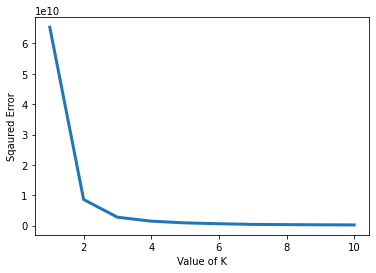

In [48]:
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 100) 
    KM.fit(data_rev_trans[['transactions','revenue']]) 
    # calculates squared error for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error") 

#K=3

In [49]:
kmean = KMeans(n_clusters=4)
yPredicted = kmean.fit_predict(data_rev_trans[['transactions', 'revenue']])

In [50]:
yPredicted1 = pd.DataFrame(yPredicted)

In [51]:
yPredicted

array([3, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 3, 0, 0, 3, 0, 1, 0, 2, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 3])

In [52]:
data_rev_trans['cluster'] = yPredicted

In [53]:
df1 = data_rev_trans[data_rev_trans['cluster'] == 0]
df2 = data_rev_trans[data_rev_trans['cluster'] == 1]
df3 = data_rev_trans[data_rev_trans['cluster'] == 2]
df4 = data_rev_trans[data_rev_trans['cluster'] == 3]

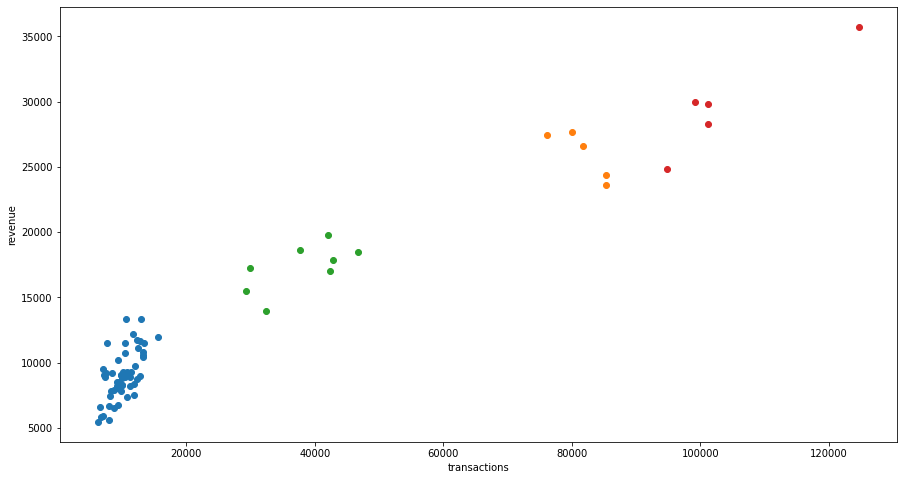

In [54]:
plt.figure(figsize=(15,8))

plt.scatter(df1['transactions'], df1['revenue'])
plt.scatter(df2['transactions'], df2['revenue'])
plt.scatter(df3['transactions'], df3['revenue'])
plt.scatter(df4['transactions'], df4['revenue'])

plt.xlabel('transactions')
plt.ylabel('revenue')
plt.show()

In [55]:
#with respect to product

In [56]:
data_pro_rev = data.groupby('product')['revenue'].sum()

In [57]:
data_pro_rev

product
Almond      80581.91
Alpen      177152.07
Beacon      53164.41
Galaxy      90919.18
Halls       18211.18
Jet         84077.56
Mars        58109.60
Milka       94249.40
Orbit       99284.25
Prince      34025.46
Star        43637.99
Trident     72289.20
Name: revenue, dtype: float64

In [58]:
df_pro_rev = pd.DataFrame(data_pro_rev)
df_pro_rev.reset_index()

,product,revenue
0,Almond,80581.91
1,Alpen,177152.07
2,Beacon,53164.41
3,Galaxy,90919.18
4,Halls,18211.18
5,Jet,84077.56
6,Mars,58109.60
7,Milka,94249.40
8,Orbit,99284.25
9,Prince,34025.46


In [59]:
data_pro_qty = data.groupby('product')['qty'].sum()

In [60]:
df_pro_qty = pd.DataFrame(data_pro_qty)
df_pro_qty.reset_index()

,product,qty
0,Almond,3258
1,Alpen,5267
2,Beacon,2152
3,Galaxy,1150
4,Halls,969
5,Jet,4262
6,Mars,2498
7,Milka,4153
8,Orbit,4375
9,Prince,1253


In [61]:
data_pro_trans = data.groupby('product')['transactions'].sum()

In [62]:
df_pro_trans = pd.DataFrame(data_pro_trans)
df_pro_trans.reset_index()

,product,transactions
0,Almond,185529
1,Alpen,284605
2,Beacon,115480
3,Galaxy,58522
4,Halls,54137
5,Jet,225651
6,Mars,113082
7,Milka,230437
8,Orbit,219739
9,Prince,58830


In [63]:
data_product = pd.concat([df_pro_rev, df_pro_qty, df_pro_trans], axis=1)

In [64]:
data_product.reset_index()

,product,revenue,qty,transactions
0,Almond,80581.91,3258,185529
1,Alpen,177152.07,5267,284605
2,Beacon,53164.41,2152,115480
3,Galaxy,90919.18,1150,58522
4,Halls,18211.18,969,54137
5,Jet,84077.56,4262,225651
6,Mars,58109.60,2498,113082
7,Milka,94249.40,4153,230437
8,Orbit,99284.25,4375,219739
9,Prince,34025.46,1253,58830


In [65]:
#KMEAN of Product [Revenue and Transactions]

Text(0, 0.5, 'Sqaured Error')

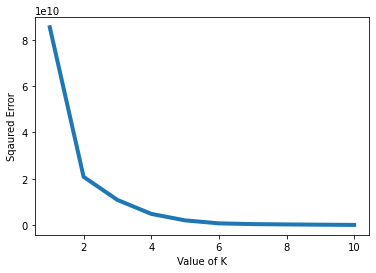

In [66]:
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 100) 
    KM.fit(data_product[['revenue', 'transactions']]) 
    # calculates squared error for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, linewidth ='4') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error") 


In [67]:
kmeanProduct = KMeans(n_clusters=4)
yPredictedProduct = kmean.fit_predict(data_product[['revenue', 'transactions']])

In [68]:
yPredictedProduct

array([2, 0, 1, 3, 3, 2, 1, 2, 2, 3, 1, 1])

In [69]:
data_product['cluster'] = yPredictedProduct

In [70]:
df1Pro = data_product[data_product['cluster']==0]
df2Pro = data_product[data_product['cluster']==1]
df3Pro = data_product[data_product['cluster']==2]


<function matplotlib.pyplot.show(*args, **kw)>

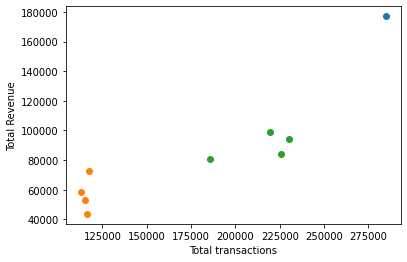

In [71]:
plt.scatter(df1Pro['transactions'],  df1Pro['revenue'])
plt.scatter(df2Pro['transactions'],  df2Pro['revenue'])
plt.scatter(df3Pro['transactions'], df3Pro['revenue'])
plt.xlabel('Total transactions')
plt.ylabel('Total Revenue')
plt.show

Text(0, 0.5, 'Sqaured Error')

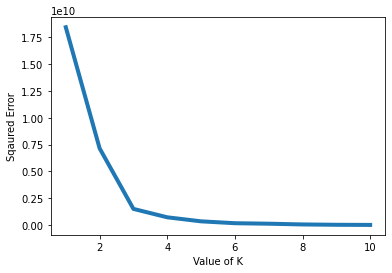

In [72]:
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 100) 
    KM.fit(data_product[['revenue', 'qty']]) 
    # calculates squared error for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, linewidth ='4') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error") 

In [73]:
kmeans = KMeans(n_clusters=3)
yPredictedPr = kmeans.fit_predict(data_product[['qty', 'revenue']])

In [74]:
yPredictedPr

array([1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1])

<function matplotlib.pyplot.show(*args, **kw)>

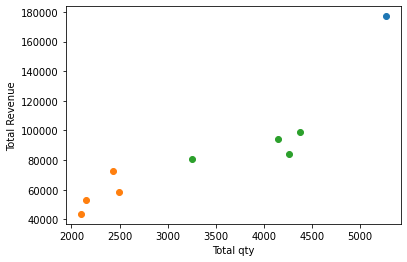

In [75]:
df1Pro = data_product[data_product['cluster']==0]
df2Pro = data_product[data_product['cluster']==1]
df3Pro = data_product[data_product['cluster']==2]

plt.scatter(df1Pro['qty'],  df1Pro['revenue'])
plt.scatter(df2Pro['qty'],  df2Pro['revenue'])
plt.scatter(df3Pro['qty'], df3Pro['revenue'])
plt.xlabel('Total qty')
plt.ylabel('Total Revenue')
plt.show

In [76]:
#Kmean for Regions

In [77]:
data_region_rev = data.groupby('region')['revenue'].sum()


In [78]:
data_region_trans = data.groupby('region')['transactions'].sum()


In [79]:
data_region_qty = data.groupby('region')['qty'].sum()


In [80]:
df_region_rev = pd.DataFrame(data_region_rev)

In [81]:
df_region_trans = pd.DataFrame(data_region_trans)

In [82]:
df_region_qty = pd.DataFrame(data_region_qty)

In [83]:
df_region = pd.concat([df_region_rev, df_region_trans, df_region_qty], axis=1)

In [84]:
df_region.reset_index()

,region,revenue,transactions,qty
0,East,146141.53,322365,5614
1,North,326109.54,674757,12174
2,South,158819.85,294245,5908
3,West,274631.29,488715,10178


In [85]:
#findind best possible value of K 

Text(0, 0.5, 'Sqaured Error')

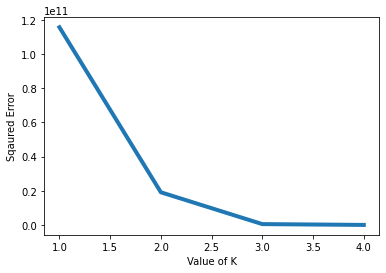

In [86]:
cost =[] 
for i in range(1, 5): 
    KM = KMeans(n_clusters = i, max_iter = 100) 
    KM.fit(df_region[['transactions', 'revenue']]) 
    # calculates squared error for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 5), cost, linewidth ='4') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error")  

In [87]:
km = KMeans(n_clusters = 2)
yPred = km.fit_predict(df_region[['revenue', 'transactions']])

In [88]:
df_region['cluster'] = yPred

In [89]:
df1= df_region[df_region['cluster']==0]
df2= df_region[df_region['cluster']==1]

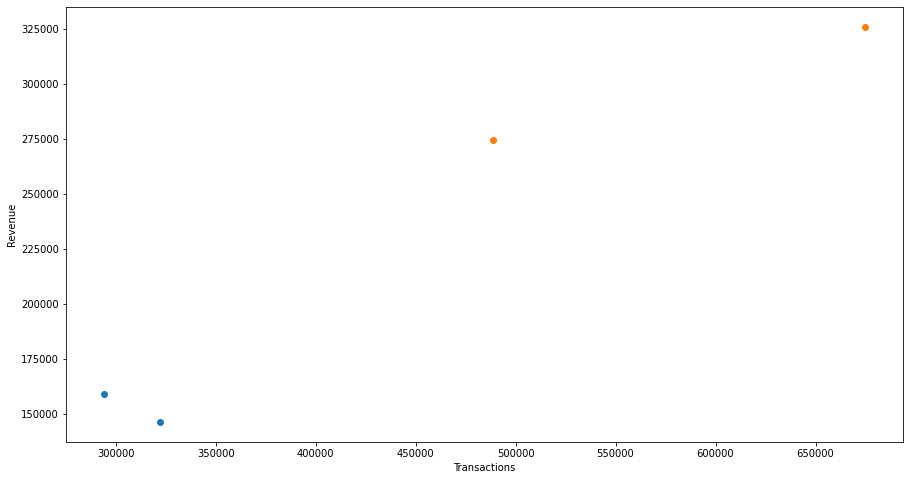

In [90]:
plt.figure(figsize=(15,8))
plt.scatter(df1['transactions'], df1['revenue'])
plt.scatter(df2['transactions'], df2['revenue'])
plt.xlabel('Transactions')
plt.ylabel('Revenue')
plt.show()


# For Each region
# East

In [91]:
dfEast = data[data['region']=='East']

In [92]:
dfEast1 = dfEast.groupby('reps')['revenue'].sum()

In [93]:
dfEast_rev = pd.DataFrame(dfEast1).reset_index()

In [94]:
dfEastQty = dfEast.groupby('reps')['qty'].sum()
dfEastTrans = dfEast.groupby('reps')['transactions'].sum()

In [95]:
dfEast_rev = pd.DataFrame(dfEast1).reset_index()
dfEast_qty = pd.DataFrame(dfEastQty).reset_index()
dfEast_trans = pd.DataFrame(dfEastTrans).reset_index()

In [96]:
df_East = pd.concat([dfEast_rev, dfEast_qty, dfEast_trans], axis=1)

In [97]:
df_East

,reps,revenue,reps,qty,reps,transactions
0,Aash,29998.47,Aash,1135,Aash,99225
1,Anusha,5816.29,Anusha,224,Anusha,6724
2,Durga,8505.90,Durga,320,Durga,9604
3,Hussain,17006.75,Hussain,683,Hussain,42436
4,Javed,7812.32,Javed,295,Javed,8281
5,Keshab,9267.94,Keshab,368,Keshab,10201
6,Kishen,8898.63,Kishen,339,Kishen,10404
7,Kumar,9214.13,Kumar,362,Kumar,8464
8,Madhu,8346.54,Madhu,310,Madhu,11881
9,Ram,5871.23,Ram,236,Ram,7056


In [98]:
df_East = df_East.drop(['reps'], axis=1)

In [99]:
df_East

,revenue,qty,transactions
0,29998.47,1135,99225
1,5816.29,224,6724
2,8505.90,320,9604
3,17006.75,683,42436
4,7812.32,295,8281
5,9267.94,368,10201
6,8898.63,339,10404
7,9214.13,362,8464
8,8346.54,310,11881
9,5871.23,236,7056


# West

In [100]:
dfWest = data[data['region']=='West']

In [101]:
df_west_trans = dfWest.groupby('reps')['transactions'].sum()

In [102]:
df_west_qty = dfWest.groupby('reps')['qty'].sum()

In [103]:
df_west_rev = dfWest.groupby('reps')['revenue'].sum()

In [104]:
df_West = pd.concat([df_west_trans, df_west_qty,df_west_rev], axis=1)

In [105]:
df_West = df_West.reset_index()

In [106]:
df_West = df_West.drop(['reps'], axis=1)

In [107]:
df_West

,transactions,qty,revenue
0,11881,303,7495.80
1,10816,268,7376.05
2,9409,368,10182.97
3,10201,310,9016.93
4,9216,314,8506.26
5,32400,539,13949.79
6,85264,876,23634.13
7,7921,240,6675.63
8,11664,412,12190.87
9,10404,459,11491.63


# North

In [108]:
dfNorth = data[data['region']=='North']

In [109]:
dfNorthtrans = dfNorth.groupby('reps')['transactions'].count()

In [110]:
dfNorthqty = dfNorth.groupby('reps')['qty'].count()
dfNorthrev = dfNorth.groupby('reps')['revenue'].count()

In [111]:
df_North = pd.concat([dfNorthtrans,dfNorthqty, dfNorthrev], axis=1)

In [112]:
df_North=df_North.reset_index()

In [113]:
df_North = df_North.drop(['reps'], axis=1)

In [114]:
df_North

,transactions,qty,revenue
0,216,216,216
1,104,104,104
2,100,100,100
3,94,94,94
4,88,88,88
5,115,115,115
6,286,286,286
7,100,100,100
8,97,97,97
9,86,86,86


# South

In [115]:
dfSouth = data[data['region']=='South']

In [116]:
dfSouthtrans = dfSouth.groupby('reps')['transactions'].count()
dfSouthqty = dfSouth.groupby('reps')['qty'].count()
dfSouthrev = dfSouth.groupby('reps')['revenue'].count()

In [117]:
df_South = pd.concat([dfSouthtrans, dfSouthqty, dfSouthrev], axis=1)
df_South = df_South.reset_index()

In [118]:
df_South=df_South.drop(['reps'], axis=1)

In [119]:
df_South

,transactions,qty,revenue
0,116,116,116
1,171,171,171
2,87,87,87
3,84,84,84
4,106,106,106
5,106,106,106
6,113,113,113
7,112,112,112
8,353,353,353
9,102,102,102


# Clusters between Transactions and Revenue | Quantity and Transactions

1. East Region
    * Transaction and Revenue
    * Quantity and Transactions
2. West Region
    * Transaction and Revenue
    * Quantity and Transactions
    
3. North Region
    * Transaction and Revenue
    * Quantity and Transactions

4. South Region
    * Transaction and Revenue
    * Quantity and Transactions

# 1. East Region

# Transactions and Revenue

Text(0, 0.5, 'Squared Error')

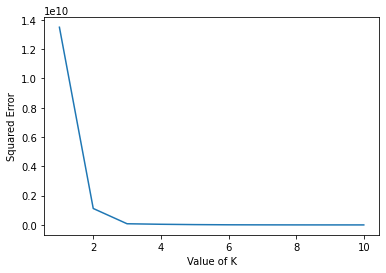

In [120]:
cost=[]
for i in range(1,11):
    KM = KMeans(n_clusters=i, max_iter=100)
    KM.fit(df_East[['transactions', 'revenue']])
    cost.append(KM.inertia_)

plt.plot(range(1,11), cost)
plt.xlabel("Value of K")
plt.ylabel('Squared Error')

In [121]:
kmean = KMeans(n_clusters=3)
yPred = kmean.fit_predict(df_East[['transactions', 'revenue']])

In [122]:
yPred = pd.DataFrame(yPred)

In [123]:
df_East['cluster'] = yPred

C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [124]:
df1 = df_East[df_East['cluster']==0]
df2 = df_East[df_East['cluster']==1]
df3 = df_East[df_East['cluster']==2]

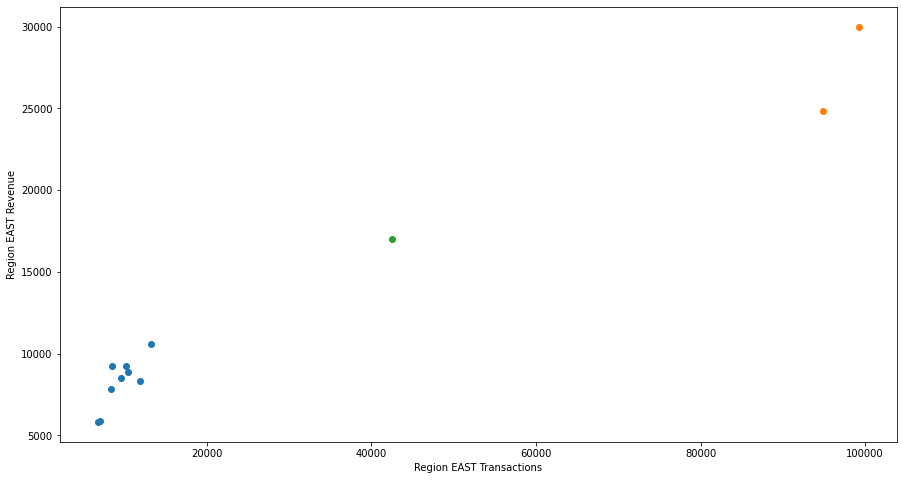

In [125]:
plt.figure(figsize=(15,8))

plt.scatter(df1['transactions'], df1['revenue'])
plt.scatter(df2['transactions'], df2['revenue'])
plt.scatter(df3['transactions'], df3['revenue'])
plt.xlabel('Region EAST Transactions')
plt.ylabel('Region EAST Revenue')
plt.show()

# Quantity and Transactions

Text(0, 0.5, 'Squared Error')

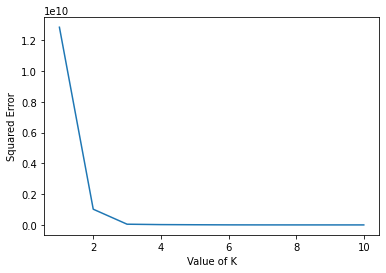

In [126]:
cost=[]
for i in range(1,11):
    KM = KMeans(n_clusters=i, max_iter=100)
    KM.fit(df_East[['qty', 'transactions']])
    cost.append(KM.inertia_)

plt.plot(range(1,11), cost)
plt.xlabel("Value of K")
plt.ylabel('Squared Error')

In [127]:
kmean = KMeans(n_clusters=2)
yPred = kmean.fit_predict(df_East[['qty', 'transactions']])
yPred = pd.DataFrame(yPred)

In [128]:
df_East['cluster2'] = yPred

C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [129]:
df_East

,revenue,qty,transactions,cluster,cluster2
0,29998.47,1135,99225,1,1
1,5816.29,224,6724,0,0
2,8505.90,320,9604,0,0
3,17006.75,683,42436,2,0
4,7812.32,295,8281,0,0
5,9267.94,368,10201,0,0
6,8898.63,339,10404,0,0
7,9214.13,362,8464,0,0
8,8346.54,310,11881,0,0
9,5871.23,236,7056,0,0


In [130]:
df1 = df_East[df_East['cluster2']==0]
df2 = df_East[df_East['cluster2']==1]
#df3 = df_East[df_East['cluster']==2]


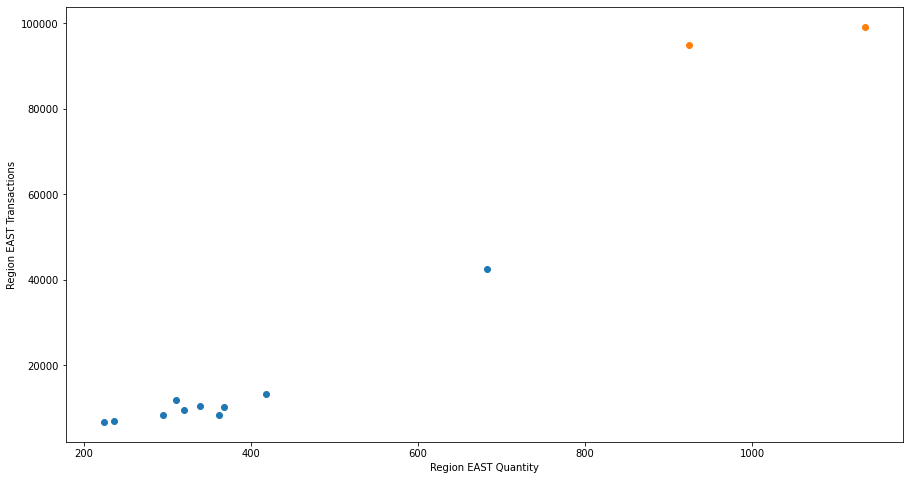

In [131]:

plt.figure(figsize=(15,8))

plt.scatter(df1['qty'], df1['transactions'])
plt.scatter(df2['qty'], df2['transactions'])
#plt.scatter(df3['transactions'], df3['revenue'])
plt.xlabel('Region EAST Quantity')
plt.ylabel('Region EAST Transactions')
plt.show()

# 2. West Region

# Transactions and Revenue

Text(0, 0.5, 'Squared Error')

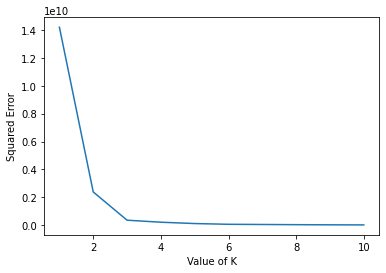

In [132]:
cost=[]
for i in range(1,11):
    KM = KMeans(n_clusters=i, max_iter=100)
    KM.fit(df_West[['transactions', 'revenue']])
    cost.append(KM.inertia_)

plt.plot(range(1,11), cost)
plt.xlabel("Value of K")
plt.ylabel('Squared Error')

In [133]:
kmean = KMeans(n_clusters=3)
yPred = kmean.fit_predict(df_West[['transactions', 'revenue']])
yPred = pd.DataFrame(yPred)



In [134]:
df_West['cluster1'] = yPred

df1 = df_West[df_West['cluster1']==0]
df2 = df_West[df_West['cluster1']==1]
df3 = df_West[df_West['cluster1']==2]



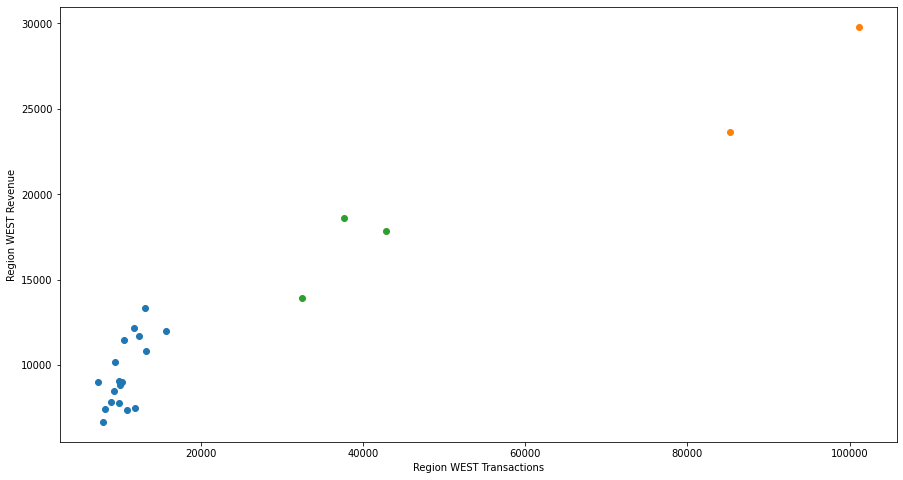

In [135]:

plt.figure(figsize=(15,8))

plt.scatter(df1['transactions'], df1['revenue'])
plt.scatter(df2['transactions'], df2['revenue'])
plt.scatter(df3['transactions'], df3['revenue'])
plt.xlabel('Region WEST Transactions')
plt.ylabel('Region WEST Revenue')
plt.show()

# Quantity and Transactions

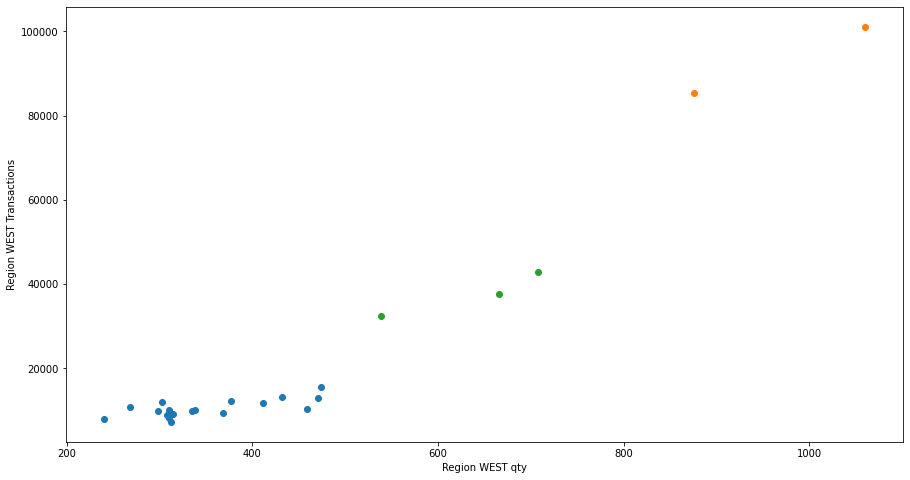

In [136]:
kmean = KMeans(n_clusters=3)
yPred = kmean.fit_predict(df_West[['qty', 'transactions']])
yPred = pd.DataFrame(yPred)

df_West['cluster'] = yPred

df1 = df_West[df_West['cluster']==0]
df2 = df_West[df_West['cluster']==1]
df3 = df_West[df_West['cluster1']==2]


plt.figure(figsize=(15,8))

plt.scatter(df1['qty'], df1['transactions'])
plt.scatter(df2['qty'], df2['transactions'])
plt.scatter(df3['qty'], df3['transactions'])
plt.xlabel('Region WEST qty')
plt.ylabel('Region WEST Transactions')
plt.show()

Clearly we can see that there is relation between transactions, revenue and quantity , transactions. 
- If we increase transactions the revenue will also increase

Text(0, 0.5, 'Squared Error')

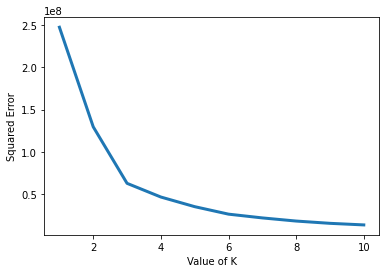

In [137]:
cost = []
for i in range(1,11):
    KM = KMeans(n_clusters = i, max_iter=100)
    KM.fit(data[['transactions', 'revenue']])
    cost.append(KM.inertia_)
    
plt.plot(range(1,11), cost, linewidth=3)
plt.xlabel('Value of K')
plt.ylabel('Squared Error')

## From above plot we can take Value of K as 3

In [138]:
kmean = KMeans(n_clusters=3)
yPredict = kmean.fit_predict(data[['transactions', 'revenue']])


In [139]:
yPredict = pd.DataFrame(yPredict)

In [140]:
data['cluster'] = yPredict

In [141]:
data

,reps,product,qty,revenue,region,transactions,cluster
0,Chitra,Galaxy,2,155.10,West,96,0
1,Vijay,Jet,2,39.30,North,111,0
2,Mala,Beacon,3,74.25,West,194,0
3,Suman,Alpen,3,100.98,North,173,0
4,Rachna,Orbit,2,44.98,North,318,1
...,...,...,...,...,...,...,...
9995,Sumedh,Jet,12,233.42,West,125,0
9996,Mala,Almond,2,48.50,West,194,0
9997,Santosh,Almond,1,25.00,West,318,1
9998,Ananya,Trident,2,59.40,North,216,1


In [142]:
df1 = data[data['cluster']==0]
df2 = data[data['cluster']==1]
df3 = data[data['cluster']==2]

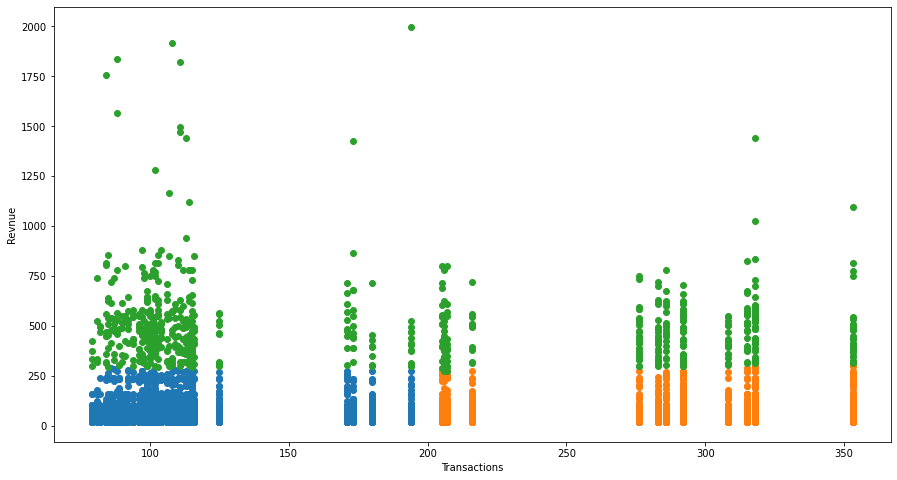

In [143]:
plt.figure(figsize=(15,8))

plt.scatter(df1['transactions'], df1['revenue'])
plt.scatter(df2['transactions'], df2['revenue'])
plt.scatter(df3['transactions'], df3['revenue'])
plt.xlabel('Transactions')
plt.ylabel('Revnue')
plt.show()

In [144]:
from sklearn.preprocessing import LabelEncoder

In [145]:
lePro  = LabelEncoder()

In [146]:
dataT = data.copy()

In [147]:
dataT['product'] = lePro.fit_transform(dataT['product'])

In [148]:
leRegion = LabelEncoder()
dataT['region'] = leRegion.fit_transform(dataT['region'])

In [149]:
dataT

,reps,product,qty,revenue,region,transactions,cluster
0,Chitra,3,2,155.10,3,96,0
1,Vijay,5,2,39.30,1,111,0
2,Mala,2,3,74.25,3,194,0
3,Suman,1,3,100.98,1,173,0
4,Rachna,8,2,44.98,1,318,1
...,...,...,...,...,...,...,...
9995,Sumedh,5,12,233.42,3,125,0
9996,Mala,0,2,48.50,3,194,0
9997,Santosh,0,1,25.00,3,318,1
9998,Ananya,11,2,59.40,1,216,1


In [150]:
X = dataT.drop(['reps', 'revenue', 'cluster'], axis=1)

In [151]:
X

,product,qty,region,transactions
0,3,2,3,96
1,5,2,1,111
2,2,3,3,194
3,1,3,1,173
4,8,2,1,318
...,...,...,...,...
9995,5,12,3,125
9996,0,2,3,194
9997,0,1,3,318
9998,11,2,1,216


In [152]:
y = dataT['revenue']

In [153]:
from sklearn.linear_model import LinearRegression

In [154]:
model = LinearRegression()

In [155]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
model.score(X, y)

0.8078118111774166

In [157]:
data = data.drop(['cluster'], axis=1)

C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


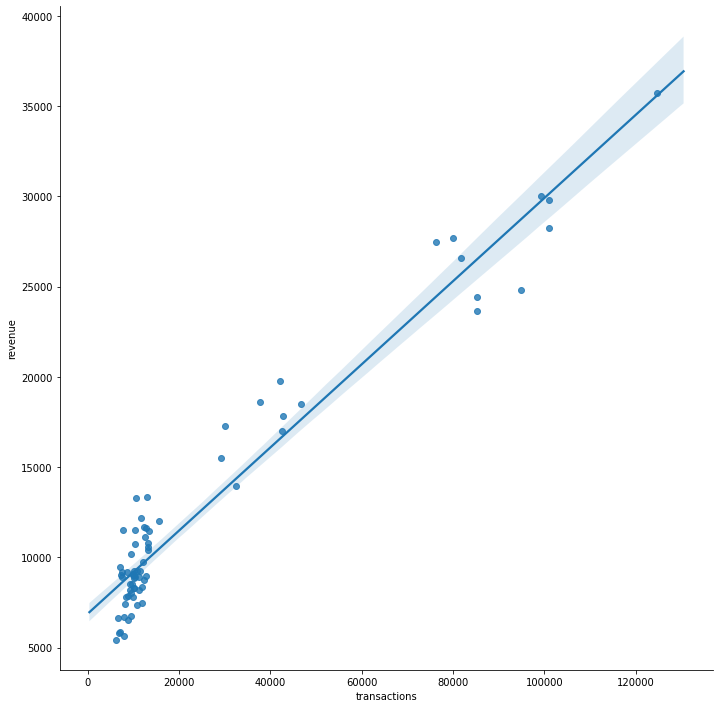

In [158]:
sns.pairplot(data_rev_trans, x_vars=['transactions'], y_vars='revenue', size=10, aspect=1, kind='reg')

In [159]:
data_trans = data.groupby('reps')['transactions'].count()
data_rev_to = data.groupby('reps')['revenue'].sum()

In [160]:
data_tran_rev_reg = pd.concat([data_trans, data_rev_to], axis=1)
data_tran_rev_reg=data_tran_rev_reg.reset_index()

C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


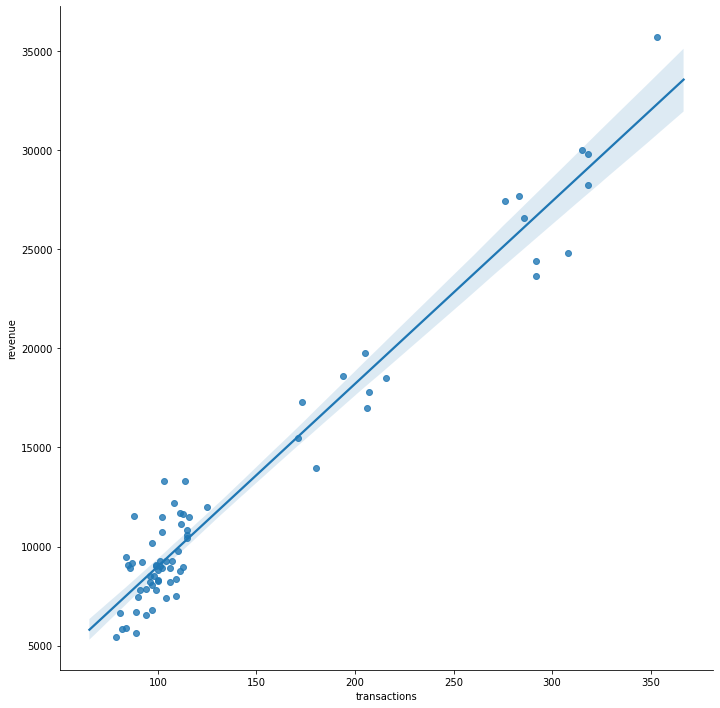

In [161]:
sns.pairplot(data_tran_rev_reg, x_vars= 'transactions', y_vars='revenue', kind='reg', size=10)